# Analytic Solutions of Nonlinear Coupled Mode Optics with Quadratic Nonlinearity

This notebook follows the paper published here:
https://arxiv.org/pdf/1512.03092.pdf

Other useful links:

https://gist.github.com/stla/d771e0a8c351d16d186c79bc838b6c48

https://github.com/stla/pyweierstrass

https://dlmf.nist.gov/search/search?q=Weierstrass%20sigma%20function#:~:text=2%3A%2023.2%20Definitions%20and%20Periodic%20Properties&text=%E2%80%A6%20%E2%96%BAThe%20function%20%E2%81%A1%20is,zeros%20at%20the%20lattice%20points.%20%E2%80%A6

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4197466/

https://math.stackexchange.com/questions/4475194/half-periods-ratio-for-the-wp-weierstrass-function

http://www.paris8.free.fr/Apostol%20T.M.%20Modular%20functions%20and%20Dirichlet%20series%20in%20number%20theory%20(Springer,1990)(600dpi)(T)(216s)_MT_.pdf

Lame stuff

https://arxiv.org/pdf/1706.07371.pdf

https://en.wikipedia.org/wiki/Lam%C3%A9_function

Numeric Weierstrass package by Stephane Laurent on mathstack STLA on github

Other numeric stuff:

https://arxiv.org/pdf/1806.06725.pdf

https://arxiv.org/abs/1601.04963

Other interesting stuff:

https://aip.scitation.org/doi/10.1063/1.4960722 HF Jones

https://arxiv.org/pdf/1609.07481.pdf

https://downloads.hindawi.com/journals/aaa/2014/769561.pdf

## Notation

In [221]:
from sympy import *
(x, y, n, m, K, P, Q, k, epsilon, z, s, p1, p2, p3, g2, g3,c1, c2, c3, 
 z0, xi1, xi2, xi3, xi4, rho1, rho2, rho3, w1, w2, w3, e1, e2, e3, Delta, 
 omega1, omega2, omega3, eta1, eta2, eta3, d1, d2, d3) = symbols(
    '''x, y, n, m, K, P, Q, k, epsilon, z, s, p1, p2, p3, g2, g3, c1, c2, c3,
    z0, xi1, xi2, xi3, xi4, rho1, rho2, rho3, w1, w2, w3, e1, e2, e3, Delta, 
    omega1, omega2, omega3, eta1, eta2, eta3, d1, d2, d3'''
)
alpha, delta, t, nu, epsilon, theta = symbols('alpha, delta, t, nu, epsilon, theta')
pw = Function('pw') # Weierstrass P function
pwp = Function('pwp') # Derivative of Weierstrass P function
zw = Function('zw') # Weierstrass Zeta function
sigma = Function('sigma') # Weierstrass Sigma function
f = Function('f')
phi = Function('phi')
phi1 = Function('phi1')
phi2 = Function('phi2')
phi3 = Function('phi3')
A = Function('A')
Ac = Function('Ac')
A1 = Function('A1')
A2 = Function('A2')
A3 = Function('A3')
Ac1 = Function('Ac1')
Ac2 = Function('Ac2')
Ac3 = Function('Ac3')
A4 = Function('A4')
A5 = Function('A5')
A6 = Function('A6')
A7 = Function('A7')
A8 = Function('A8')
W1 = Function('W1')
W2 = Function('W2')
W3 = Function('W3')
W4 = Function('W4')
W5 = Function('W5')
W6 = Function('W6')
p = IndexedBase('p')

mu = Function('mu')
kappa = IndexedBase('kappa')
beta = IndexedBase('beta')
a = IndexedBase('a')


The term mode function is used to refer to the complex functions of the coupled nonlinear system of differential equations. They are each denoted with a subscript to distinguish them like:

In [2]:
A1(z)

A1(z)

The following is used to denote the complex conjugate of the field:

In [3]:
Ac1(z)

Ac1(z)

The product of a complex field with it's complex conjugate is referred to as the modal power:

In [4]:
Eq(abs(A1(z))**2, A1(z)*Ac1(z))

Eq(Abs(A1(z))**2, A1(z)*Ac1(z))

For complex variable z, and elliptic invariants $g_2$ and $g_3$, the following is used to denote the Weierstrass P function:

In [5]:
pw(z,g2,g3)

pw(z, g2, g3)

The following is used to denote the Weierstrass P Prime function (derivative of Weierstrass P):

In [6]:
pwp(z,g2,g3)

pwp(z, g2, g3)

The following is used to denote the Weierstrass Zeta function:

In [7]:
zw(z,g2,g3)

zw(z, g2, g3)

The following is used to denote the Weierstrass Sigma function:

In [8]:
sigma(z,g2,g3)

sigma(z, g2, g3)

## Quadratic Case

When the system of nonlinear coupled differential equations has, at most, terms that are products of two fields it is said to have quadratic nonlinearity. This is the case being considered here while cubic nonlinearity is to be considered in subsequent notbooks.

### Equations of Motion

This notebook will derive analytic solutions to the following system of nonlinear coupled differential equations:

In [9]:
A1p = I*A1(z) + I*Ac2(z)*A3(z)
Ac1p = -I*Ac1(z) - I*A2(z)*Ac3(z)
Eq(diff(A1(z),z), A1p)

Eq(Derivative(A1(z), z), I*A1(z) + I*A3(z)*Ac2(z))

In [10]:
A2p = I*A2(z) + I*Ac1(z)*A3(z)
Ac2p = -I*Ac2(z) - I*A1(z)*Ac3(z)
Eq(diff(A2(z),z), A2p)

Eq(Derivative(A2(z), z), I*A2(z) + I*A3(z)*Ac1(z))

In [11]:
A3p = I*A3(z) + 2*I*A1(z)*A2(z)
Ac3p = -I*Ac3(z) - 2*I*Ac1(z)*Ac2(z)
Eq(diff(A3(z),z), A3p)

Eq(Derivative(A3(z), z), 2*I*A1(z)*A2(z) + I*A3(z))

### Conserved Quantities

The system of equations conserves the following quantities:

In [12]:
Pval = A1(z)*Ac1(z) + A2(z)*Ac2(z) + A3(z)*Ac3(z)
Qval = A1(z)*Ac1(z) - A2(z)*Ac2(z)
Kval = A1(z)*Ac1(z) + A2(z)*Ac2(z) + A3(z)*Ac3(z)/2 + A1(z)*A2(z)*Ac3(z) + Ac1(z)*Ac2(z)*A3(z)
diff_subs = [
    (diff(A1(z),z),A1p),(diff(A2(z),z),A2p),(diff(A3(z),z),A3p),
    (diff(Ac1(z),z),Ac1p),(diff(Ac2(z),z),Ac2p),(diff(Ac3(z),z),Ac3p)
]
conserved_subs = [(P, Pval), (Q, Qval), (K, Kval)]

In [13]:
Eq(P,Pval)

Eq(P, A1(z)*Ac1(z) + A2(z)*Ac2(z) + A3(z)*Ac3(z))

In [14]:
diff(Pval,z).subs(diff_subs).simplify()

0

In [15]:
Eq(Q,Qval)

Eq(Q, A1(z)*Ac1(z) - A2(z)*Ac2(z))

In [16]:
diff(Qval,z).subs(diff_subs).simplify()

0

In [17]:
Kval_eq = Eq(K,Kval)
Kval_eq

Eq(K, A1(z)*A2(z)*Ac3(z) + A1(z)*Ac1(z) + A2(z)*Ac2(z) + A3(z)*Ac1(z)*Ac2(z) + A3(z)*Ac3(z)/2)

In [18]:
diff(Kval,z).subs(diff_subs).simplify()

0

### Solving the Modal Power Analytically

The first step is to derive a differential equation for the power in one mode which is decoupled from the other fields:

In [19]:
P1p_eq = Eq(Derivative(A1(z)*Ac1(z),z),diff(A1(z)*Ac1(z),z).subs(diff_subs).simplify())
P1p_eq

Eq(Derivative(A1(z)*Ac1(z), z), I*(-A1(z)*A2(z)*Ac3(z) + A3(z)*Ac1(z)*Ac2(z)))

By using the conserved quantities it can be seen that the derivative squared is proportional to a cubic and that this can be made to resemble the differential equation for the Weiertrass P function:

In [20]:
P1pSqrd = (-8*(A1(z)*Ac1(z))**3 - (1 - 12*Q - 4*P)*(A1(z)*Ac1(z))**2 + (2*K - P + Q - 4*Q*P - 4*Q**2)*(A1(z)*Ac1(z)) -
   (K - P/2 + Q/2)**2)
Eq(Derivative(A1(z)*Ac1(z),z)**2, P1pSqrd)

Eq(Derivative(A1(z)*Ac1(z), z)**2, -(K - P/2 + Q/2)**2 - (-4*P - 12*Q + 1)*A1(z)**2*Ac1(z)**2 + (2*K - 4*P*Q - P - 4*Q**2 + Q)*A1(z)*Ac1(z) - 8*A1(z)**3*Ac1(z)**3)

In [21]:
(diff(A1(z)*Ac1(z),z)**2 - P1pSqrd).subs(diff_subs + conserved_subs).simplify()

0

It is useful at this stage to define the following constants to simplify the algebra:

In [22]:
p1val = (P/3 - Rational(1,12) + Q)
p2val = (P/3 - Rational(1,12) - Q)
p3val = (2*K - P + Q)
P_val_in_p = (p1+p2)*Rational(3/2) + Rational(1/4)
Q_val_in_p = (p1-p2)/2
K_val_in_p = (p1 + p3)/2 + p2 + Rational(1/8)
PQK_sub_vals = [(Q,Q_val_in_p), (P,P_val_in_p), (K,K_val_in_p)]

In [23]:
Eq(p1, p1val)

Eq(p1, P/3 + Q - 1/12)

In [24]:
Eq(p1, p1val.subs(conserved_subs))

Eq(p1, 4*A1(z)*Ac1(z)/3 - 2*A2(z)*Ac2(z)/3 + A3(z)*Ac3(z)/3 - 1/12)

In [25]:
Eq(p2, p2val)

Eq(p2, P/3 - Q - 1/12)

In [26]:
Eq(p2, p2val.subs(conserved_subs))

Eq(p2, -2*A1(z)*Ac1(z)/3 + 4*A2(z)*Ac2(z)/3 + A3(z)*Ac3(z)/3 - 1/12)

In [27]:
Eq(p3, p3val)

Eq(p3, 2*K - P + Q)

In [28]:
Eq(p3, p3val.subs(conserved_subs))

Eq(p3, 2*A1(z)*A2(z)*Ac3(z) + 2*A1(z)*Ac1(z) + 2*A3(z)*Ac1(z)*Ac2(z))

The following quantities g2 and g3 are the elliptic invariants:

In [29]:
g2val = 4*(p1val**2 + p1val*p2val + p2val**2) + 2*p3val - p1val + p2val
g3val = (p1val - p3val)**2 - 4*(p1val*p2val**2 + p2val*p1val**2) - p1val*p2val

In [30]:
g2_p = Eq(g2, 4*(p1**2 + p1*p2 + p2**2) + 2*p3 - p1 + p2)
g2_p

Eq(g2, 4*p1**2 + 4*p1*p2 - p1 + 4*p2**2 + p2 + 2*p3)

In [31]:
Eq(g2, g2val)

Eq(g2, 4*K - 2*P + 4*(P/3 - Q - 1/12)**2 + 4*(P/3 - Q - 1/12)*(P/3 + Q - 1/12) + 4*(P/3 + Q - 1/12)**2)

In [32]:
g3_p = Eq(g3, (p1 - p3)**2 - 4*(p1*p2**2 + p2*p1**2) - p1*p2)
g3_p

Eq(g3, -4*p1**2*p2 - 4*p1*p2**2 - p1*p2 + (p1 - p3)**2)

In [33]:
Eq(g3, g3val)

Eq(g3, (-2*K + 4*P/3 - 1/12)**2 - 4*(P/3 - Q - 1/12)**2*(P/3 + Q - 1/12) - 4*(P/3 - Q - 1/12)*(P/3 + Q - 1/12)**2 - (P/3 - Q - 1/12)*(P/3 + Q - 1/12))

Then, if the following function is defined it can be shown that the differential equation for the power in mode 1 is transformed into the differential equation for the Weierstrass P function:

In [34]:
Eq(W1(z), p1 - 2*A1(z)*Ac1(z))

Eq(W1(z), p1 - 2*A1(z)*Ac1(z))

In [35]:
eq1 = Eq(4*Derivative(A1(z)*Ac1(z),z)**2, 4*P1pSqrd).subs(Ac1(z), (p1 - W1(z)).subs(p1, p1val)/A1(z)/2).expand()
eq2 = Eq(diff(W1(z),z)**2,4*W1(z)**3 - g2*W1(z) - g3)
eq2

Eq(Derivative(W1(z), z)**2, -g2*W1(z) - g3 + 4*W1(z)**3)

In [36]:
Eq(W1(z),pw(z-z0, g2, g3))

Eq(W1(z), pw(z - z0, g2, g3))

In [37]:
(eq2.rhs - eq1.rhs).subs([(g2,g2val), (g3,g3val)]).subs([(p1, p1val),(p2,p2val), (p3,p3val)]).simplify()

0

In [38]:
eq_pow_1_p = Eq(A1(z)*Ac1(z),(p1 - W1(z))/2).subs(W1(z),pw(z-z0, g2, g3))
eq_pow_1_p

Eq(A1(z)*Ac1(z), p1/2 - pw(z - z0, g2, g3)/2)

In [39]:
eq_pow_1 = eq_pow_1_p.subs(p1,p1val)
eq_pow_1

Eq(A1(z)*Ac1(z), P/6 + Q/2 - pw(z - z0, g2, g3)/2 - 1/24)

The point $z_0$ is then defined by the initial conditions as follows:

In [40]:
w_symmetries = [(pw(-z0,g2,g3), pw(z0,g2,g3)), (pwp(-z0,g2,g3), -pwp(z0,g2,g3))]

In [41]:
pw_z0_eq = Eq(-eq_pow_1_p.rhs*2 + p1, -eq_pow_1_p.lhs*2 + p1).subs(z,0).subs(w_symmetries)
pw_z0_eq

Eq(pw(z0, g2, g3), p1 - 2*A1(0)*Ac1(0))

In [42]:
pwp_z0_eq = Eq(
    diff(eq_pow_1_p.rhs*2 - p1,z), 
    2*Derivative(eq_pow_1_p.lhs,z) - diff(p1,z)
).subs(
    [(diff(-eq_pow_1_p.rhs*2 + p1,z),pwp(z-z0,g2,g3)), (P1p_eq.lhs, P1p_eq.rhs)]
).subs(z,0).subs(w_symmetries)
pwp_z0_eq

Eq(pwp(z0, g2, g3), 2*I*(-A1(0)*A2(0)*Ac3(0) + A3(0)*Ac1(0)*Ac2(0)))

Having shown that the power in mode 1 is expressible in terms of the Weierstrass P function, the power in modes 2 and 3 can be found using the conserved quantities:

In [43]:
eq_pow_2 = Eq(Q,Qval).subs(A1(z)*Ac1(z),eq_pow_1.rhs).subs(p1,p1val)
_a2q = A2(z)*Ac2(z) - Q
eq_pow_2 = Eq(eq_pow_2.lhs + _a2q, eq_pow_2.rhs + _a2q)
eq_pow_2

Eq(A2(z)*Ac2(z), P/6 - Q/2 - pw(z - z0, g2, g3)/2 - 1/24)

In [44]:
eq_pow_2_p = eq_pow_2.subs(PQK_sub_vals)
eq_pow_2_p

Eq(A2(z)*Ac2(z), p2/2 - pw(z - z0, g2, g3)/2)

In [45]:
eq_pow_3 = (Eq(P,Pval)
            .subs([(A1(z)*Ac1(z),eq_pow_1.rhs), (A2(z)*Ac2(z),eq_pow_2.rhs)])
            .subs(p1,p1val))
_a3p = A3(z)*Ac3(z) + P 
eq_pow_3 = Eq(-eq_pow_3.lhs + _a3p, -eq_pow_3.rhs + _a3p)
eq_pow_3

Eq(A3(z)*Ac3(z), 2*P/3 + pw(z - z0, g2, g3) + 1/12)

In [46]:
eq_pow_3_p = eq_pow_3.subs(PQK_sub_vals)
eq_pow_3_p

Eq(A3(z)*Ac3(z), p1 + p2 + pw(z - z0, g2, g3) + 1/4)

The derivative of the power in each mode is then expressible in terms of the Weierstrass P Prime function:

In [47]:
eq_pow_1_div = Eq(Derivative(eq_pow_1.lhs,z), diff(eq_pow_1.rhs,z)).subs(diff(pw(z-z0, g2, g3),z),pwp(z-z0, g2, g3))
eq_pow_1_div

Eq(Derivative(A1(z)*Ac1(z), z), -pwp(z - z0, g2, g3)/2)

In [48]:
eq_pow_2_div = Eq(Derivative(eq_pow_2.lhs,z), diff(eq_pow_2.rhs,z)).subs(diff(pw(z-z0, g2, g3),z),pwp(z-z0, g2, g3))
eq_pow_2_div

Eq(Derivative(A2(z)*Ac2(z), z), -pwp(z - z0, g2, g3)/2)

In [49]:
eq_pow_3_div = Eq(Derivative(eq_pow_3.lhs,z), diff(eq_pow_3.rhs,z)).subs(diff(pw(z-z0, g2, g3),z),pwp(z-z0, g2, g3))
eq_pow_3_div

Eq(Derivative(A3(z)*Ac3(z), z), pwp(z - z0, g2, g3))

It is then useful to define the following complex constants $\xi_1, \xi_2, \xi_3$ and relate them via Weiertrass P and P Prime to the $p_1, p_2, p_3$ constants. 

In [50]:
xi1_p1 = Eq(pw(xi1,g2,g3), p1)
xi1_p1

Eq(pw(xi1, g2, g3), p1)

In [51]:
xi2_p2 = Eq(pw(xi2,g2,g3), p2)
xi2_p2 

Eq(pw(xi2, g2, g3), p2)

In [52]:
xi3_p1_p2 = Eq(pw(xi3,g2,g3), - p1 - p2 - Rational(1,4))
xi3_p1_p2

Eq(pw(xi3, g2, g3), -p1 - p2 - 1/4)

In [53]:
pw_for_pvals_subs = [(xi1_p1.lhs, xi1_p1.rhs), (xi2_p2.lhs, xi2_p2.rhs), (xi3_p1_p2.lhs, xi3_p1_p2.rhs)]
pvals_for_pw_subs = [(xi1_p1.rhs, xi1_p1.lhs), (xi2_p2.rhs, xi2_p2.lhs), (xi3_p1_p2.rhs, xi3_p1_p2.lhs)]

Then from the differential equation for the Weierstrass P function it is seen that the Weierstrass P Prime function squared takes the following values in $p_1,p_2,p_3$, when evaluated at $\xi_1,\xi_2,\xi_3$:

In [54]:
(eq2
.subs([(eq2.lhs, pwp(xi1)**2), (W1(z), pw(xi1,g2,g3))])
.subs(pw_for_pvals_subs)
.subs([(g2_p.lhs, g2_p.rhs), (g3_p.lhs, g3_p.rhs)])
 .subs([(pwp(xi1)**2, pwp(xi1,g2,g3)**2)])
).expand()

Eq(pwp(xi1, g2, g3)**2, -p3**2)

In [55]:
factor((eq2
.subs([(eq2.lhs, pwp(xi2)**2), (W1(z), pw(xi2,g2,g3))])
.subs(pw_for_pvals_subs)
.subs([(g2_p.lhs, g2_p.rhs), (g3_p.lhs, g3_p.rhs)])
 .subs([(pwp(xi2)**2, pwp(xi2,g2,g3)**2)])
).simplify())

Eq(pwp(xi2, g2, g3)**2, -(p1 - p2 - p3)**2)

In [56]:
factor((eq2
.subs([(eq2.lhs, pwp(xi3)**2), (W1(z), pw(xi3,g2,g3))])
.subs(pw_for_pvals_subs)
.subs([(g2_p.lhs, g2_p.rhs), (g3_p.lhs, g3_p.rhs)])
 .subs([(pwp(xi3)**2, pwp(xi3,g2,g3)**2)])
).simplify())

Eq(pwp(xi3, g2, g3)**2, -(8*p1 + 4*p2 - 4*p3 + 1)**2/16)

There is some freedom to pick the sign for the square root but swapping the sign in front of $\xi$ would give the other root anyway so it doesn't matter much. Therefore, the following properties are used to further design the $\xi$ constants:

In [57]:
eq_pwp_xi1 = Eq(pwp(xi1,g2,g3), I*p3)
eq_pwp_xi1

Eq(pwp(xi1, g2, g3), I*p3)

In [58]:
eq_pwp_xi2 = Eq(pwp(xi2,g2,g3), I*(p3 - p1 + p2))
eq_pwp_xi2

Eq(pwp(xi2, g2, g3), I*(-p1 + p2 + p3))

In [59]:
eq_pwp_xi3 = Eq(pwp(xi3,g2,g3), I*(2*p1 + p2 - p3 + Rational(1,4)))
eq_pwp_xi3

Eq(pwp(xi3, g2, g3), I*(2*p1 + p2 - p3 + 1/4))

Then, the solutions for the power in each mode can be written in terms of $\xi_1,\xi_2,\xi_3$ as follows:

In [60]:
eq_pow_1_pw = eq_pow_1_p.subs(*pvals_for_pw_subs[0])
eq_pow_1_pw

Eq(A1(z)*Ac1(z), pw(xi1, g2, g3)/2 - pw(z - z0, g2, g3)/2)

In [61]:
eq_pow_2_pw = eq_pow_2_p.subs(*pvals_for_pw_subs[1])
eq_pow_2_pw

Eq(A2(z)*Ac2(z), pw(xi2, g2, g3)/2 - pw(z - z0, g2, g3)/2)

In [62]:
eq_pow_3_pw = eq_pow_3_p.subs(*pvals_for_pw_subs[2])
eq_pow_3_pw

Eq(A3(z)*Ac3(z), -pw(xi3, g2, g3) + pw(z - z0, g2, g3))

#### On the congruence of $\xi_1,\xi_2,\xi_3$

The following is an addition identity for the Weierstrass P function:
https://dlmf.nist.gov/23.10

In [331]:
wp_add_id = Eq(pw(x+y, g2, g3),
               (((pwp(x,g2,g3) - pwp(y,g2,g3))/(pw(x,g2,g3) - pw(y,g2,g3)))**2)/4 - pw(x, g2, g3) - pw(y, g2, g3))
wp_add_id

Eq(pw(x + y, g2, g3), -pw(x, g2, g3) - pw(y, g2, g3) + (pwp(x, g2, g3) - pwp(y, g2, g3))**2/(4*(pw(x, g2, g3) - pw(y, g2, g3))**2))

In [333]:
xi_congruence_eq = wp_add_id.subs([(x,xi1),(y,xi2)])
xi_congruence_eq = Eq(xi_congruence_eq.lhs - pw(xi3,g2,g3), xi_congruence_eq.rhs - pw(xi3,g2,g3))
xi_congruence_eq

Eq(-pw(xi3, g2, g3) + pw(xi1 + xi2, g2, g3), -pw(xi1, g2, g3) - pw(xi2, g2, g3) - pw(xi3, g2, g3) + (pwp(xi1, g2, g3) - pwp(xi2, g2, g3))**2/(4*(pw(xi1, g2, g3) - pw(xi2, g2, g3))**2))

In [346]:
xi_p_subs = [
    (xi1_p1.lhs, xi1_p1.rhs), (xi2_p2.lhs, xi2_p2.rhs), (xi3_p1_p2.lhs, xi3_p1_p2.rhs),
    (eq_pwp_xi1.lhs, eq_pwp_xi1.rhs), (eq_pwp_xi2.lhs, eq_pwp_xi2.rhs), (eq_pwp_xi3.lhs, eq_pwp_xi3.rhs)
]
Eq(xi_congruence_eq.lhs, xi_congruence_eq.rhs.subs(xi_p_subs)).simplify()

Eq(pw(xi3, g2, g3) - pw(xi1 + xi2, g2, g3), 0)

Thus $\xi_3$ is congruent to $\xi_1 + \xi_2$, that is, there exist integers n and m such that, for two independent half-periods $\omega_1$ and $\omega_3$:

In [365]:
xi_3_congruence_eq = Eq(xi3 + 2*n*omega1 + 2*m*omega3, xi2 + xi1)
xi_3_congruence_eq

Eq(2*m*omega3 + 2*n*omega1 + xi3, xi1 + xi2)

The following two variable identity is given as an unproven example in Example 2 p444 of Whittaker and Watson, A course of Modern Analysis, 2nd Edition:

In [351]:
pw_to_zw_identity = Eq(
    (pwp(x,g2,g3) - pwp(y,g2,g3))/(pw(x,g2,g3) - pw(y,g2,g3))/2,
    zw(x + y,g2, g3) - zw(x,g2, g3) - zw(y,g2, g3)
)
pw_to_zw_identity

Eq((pwp(x, g2, g3) - pwp(y, g2, g3))/(2*(pw(x, g2, g3) - pw(y, g2, g3))), -zw(x, g2, g3) - zw(y, g2, g3) + zw(x + y, g2, g3))

from which it is shown that:

In [369]:
zw_xi1_xi2_eq = pw_to_zw_identity.subs([(x,xi1),(y,xi2)]).subs(xi_p_subs).simplify()
zw_xi1_xi2_eq

Eq(zw(xi1, g2, g3) + zw(xi2, g2, g3) - zw(xi1 + xi2, g2, g3), -I/2)

Using the known quasi periodicity of the Weierstrass Zeta function:

In [359]:
Eq(zw(z + 2*omega1*n,g2,g3),zw(z,g2,g3) + 2*n*eta1)

Eq(zw(2*n*omega1 + z, g2, g3), 2*eta1*n + zw(z, g2, g3))

In [360]:
Eq(zw(z + 2*omega3*m,g2,g3),zw(z,g2,g3) + 2*m*eta3)

Eq(zw(2*m*omega3 + z, g2, g3), 2*eta3*m + zw(z, g2, g3))

In [367]:
zw_quasi_eq = Eq(zw(z + 2*omega1*n+ 2*omega3*m,g2,g3), zw(z,g2,g3) + 2*n*eta1 + 2*m*eta3)
zw_quasi_eq

Eq(zw(2*m*omega3 + 2*n*omega1 + z, g2, g3), 2*eta1*n + 2*eta3*m + zw(z, g2, g3))

In [373]:
zw_xi1_xi2_xi3_a = zw_quasi_eq.subs(z,xi3).subs(xi_3_congruence_eq.lhs, xi_3_congruence_eq.rhs)
zw_xi1_xi2_xi3_a

Eq(zw(xi1 + xi2, g2, g3), 2*eta1*n + 2*eta3*m + zw(xi3, g2, g3))

In [376]:
zw_xi1_xi2_xi3_eq = zw_xi1_xi2_eq.subs(zw_xi1_xi2_xi3_a.lhs, zw_xi1_xi2_xi3_a.rhs)
zw_xi1_xi2_xi3_eq

Eq(-2*eta1*n - 2*eta3*m + zw(xi1, g2, g3) + zw(xi2, g2, g3) - zw(xi3, g2, g3), -I/2)

where:

In [361]:
Eq(eta1, zw(omega1, g2, g3))

Eq(eta1, zw(omega1, g2, g3))

In [362]:
Eq(eta3, zw(omega3, g2, g3))

Eq(eta3, zw(omega3, g2, g3))

### Logarithmic derivative identities for complex functions

In [63]:
Eq(A(z),abs(A(z))*exp(I*phi(z)))

Eq(A(z), exp(I*phi(z))*Abs(A(z)))

In [64]:
Eq(Derivative(log(A(z)/Ac(z)),z), Derivative(log(exp(I*2*phi(z))),z))

Eq(Derivative(log(A(z)/Ac(z)), z), Derivative(log(exp(2*I*phi(z))), z))

In [65]:
Eq(Derivative(A(z)/Ac(z),z)/(A(z)/Ac(z)), I*2*Derivative(phi(z),z))

Eq(Ac(z)*Derivative(A(z)/Ac(z), z)/A(z), 2*I*Derivative(phi(z), z))

In [66]:
phase_to_modes_diff = Eq(
    I*Derivative(Ac(z)/A(z),z)/(Ac(z)/A(z))*A(z)*Ac(z),
    2*Derivative(phi(z),z)*A(z)*Ac(z)
).doit().simplify()
phase_to_modes_diff

Eq(2*A(z)*Ac(z)*Derivative(phi(z), z), I*(A(z)*Derivative(Ac(z), z) - Ac(z)*Derivative(A(z), z)))

In [67]:
Eq(Derivative(log(A(z)),z),Derivative(log(abs(A(z))**2),z)*Rational(1,2) + Derivative(log(exp(I*phi(z))),z))

Eq(Derivative(log(A(z)), z), Derivative(log(exp(I*phi(z))), z) + Derivative(log(Abs(A(z))**2), z)/2)

In [68]:
log_diff_in_phi_A = Eq(Derivative(A(z),z)/A(z),Derivative(abs(A(z))**2,z)/(2*abs(A(z))**2) + I*Derivative(phi(z),z))
log_diff_in_phi_A

Eq(Derivative(A(z), z)/A(z), I*Derivative(phi(z), z) + Derivative(Abs(A(z))**2, z)/(2*Abs(A(z))**2))

### The differential equations for the modal phase

The terms in K that are products of 3 fields can be written in terms of the derivatve in each field and its complex conjuagte:

In [69]:
K_3_term_part = A1(z)*A2(z)*Ac3(z) + Ac1(z)*Ac2(z)*A3(z)
A_diff_subs = [
    (diff(A1(z),z),A1p),(diff(Ac1(z),z),Ac1p),
    (diff(A2(z),z),A2p),(diff(Ac2(z),z),Ac2p),
    (diff(A3(z),z),A3p),(diff(Ac3(z),z),Ac3p)
]
eq_conj_diff_1 = -I*Ac1(z)*diff(A1(z),z) + I*A1(z)*diff(Ac1(z),z) - 2*A1(z)*Ac1(z)
eq_conj_diff_2 = eq_conj_diff_1.subs([(A1(z),A2(z)),(Ac1(z),Ac2(z))])
eq_conj_diff_3 = eq_conj_diff_1.subs([(A1(z),A3(z)),(Ac1(z),Ac3(z))])

In [70]:
eq_K_3_term_part_1 = Eq(eq_conj_diff_1, eq_conj_diff_1.subs(A_diff_subs)).expand()
eq_K_3_term_part_1

Eq(-2*A1(z)*Ac1(z) + I*A1(z)*Derivative(Ac1(z), z) - I*Ac1(z)*Derivative(A1(z), z), A1(z)*A2(z)*Ac3(z) + A3(z)*Ac1(z)*Ac2(z))

In [71]:
eq_K_3_term_part_2 = Eq(eq_conj_diff_2, eq_conj_diff_2.subs(A_diff_subs)).expand()
eq_K_3_term_part_2

Eq(-2*A2(z)*Ac2(z) + I*A2(z)*Derivative(Ac2(z), z) - I*Ac2(z)*Derivative(A2(z), z), A1(z)*A2(z)*Ac3(z) + A3(z)*Ac1(z)*Ac2(z))

In [72]:
eq_K_3_term_part_3 = Eq(eq_conj_diff_3, eq_conj_diff_3.subs(A_diff_subs)).expand()
eq_K_3_term_part_3

Eq(-2*A3(z)*Ac3(z) + I*A3(z)*Derivative(Ac3(z), z) - I*Ac3(z)*Derivative(A3(z), z), 2*A1(z)*A2(z)*Ac3(z) + 2*A3(z)*Ac1(z)*Ac2(z))

The expressions for the 3 mode terms in K in terms of the derivative of each mode and its conjugate are the starting point for deriving the differnetial equations for the phases $\phi_1, \phi_2, \phi_3$ of each mode:

In [73]:
eq_K_3_term_part_1

Eq(-2*A1(z)*Ac1(z) + I*A1(z)*Derivative(Ac1(z), z) - I*Ac1(z)*Derivative(A1(z), z), A1(z)*A2(z)*Ac3(z) + A3(z)*Ac1(z)*Ac2(z))

Then using the general identity:

In [74]:
phase_to_modes_diff

Eq(2*A(z)*Ac(z)*Derivative(phi(z), z), I*(A(z)*Derivative(Ac(z), z) - Ac(z)*Derivative(A(z), z)))

In [75]:
phi1_to_K = Eq(
    eq_K_3_term_part_1.lhs + 
    (phase_to_modes_diff.lhs - phase_to_modes_diff.rhs).subs([(A(z),A1(z)),(Ac(z),Ac1(z)),(phi(z),phi1(z))]),
    eq_K_3_term_part_1.rhs - Kval + K - (Qval - Q)*Rational(1,2) + (Pval - P)*Rational(1,2)
).expand()
phi1_to_K

Eq(2*A1(z)*Ac1(z)*Derivative(phi1(z), z) - 2*A1(z)*Ac1(z), K - P/2 + Q/2 - A1(z)*Ac1(z))

In [76]:
phi1_to_A1 = Eq(Derivative(phi1(z),z), solve(phi1_to_K,Derivative(phi1(z),z))[0])
phi1_to_A1

Eq(Derivative(phi1(z), z), (2*K - P + Q + 2*A1(z)*Ac1(z))/(4*A1(z)*Ac1(z)))

In [77]:
phi2_to_K = Eq(
    eq_K_3_term_part_2.lhs + 
    (phase_to_modes_diff.lhs - phase_to_modes_diff.rhs).subs([(A(z),A2(z)),(Ac(z),Ac2(z)),(phi(z),phi2(z))]),
    eq_K_3_term_part_2.rhs - Kval + K + (Qval - Q)*Rational(1,2) + (Pval - P)*Rational(1,2)
).expand()
phi2_to_K

Eq(2*A2(z)*Ac2(z)*Derivative(phi2(z), z) - 2*A2(z)*Ac2(z), K - P/2 - Q/2 - A2(z)*Ac2(z))

In [78]:
phi2_to_A2 = Eq(Derivative(phi2(z),z), solve(phi2_to_K,Derivative(phi2(z),z))[0])
phi2_to_A2

Eq(Derivative(phi2(z), z), (2*K - P - Q + 2*A2(z)*Ac2(z))/(4*A2(z)*Ac2(z)))

In [79]:
phi3_to_K = Eq(
    eq_K_3_term_part_3.lhs + 
    (phase_to_modes_diff.lhs - phase_to_modes_diff.rhs).subs([(A(z),A3(z)),(Ac(z),Ac3(z)),(phi(z),phi3(z))]),
    eq_K_3_term_part_3.rhs  - 2*Kval + 2*K + 2*(Pval - P)
).expand()
phi3_to_K

Eq(2*A3(z)*Ac3(z)*Derivative(phi3(z), z) - 2*A3(z)*Ac3(z), 2*K - 2*P + A3(z)*Ac3(z))

In [80]:
phi3_to_A3 = Eq(Derivative(phi3(z),z), solve(phi3_to_K, Derivative(phi3(z),z))[0])
phi3_to_A3

Eq(Derivative(phi3(z), z), (K - P + 3*A3(z)*Ac3(z)/2)/(A3(z)*Ac3(z)))

In [81]:
phi1_to_pw = phi1_to_A1.subs([(eq_pow_1_p.lhs, eq_pow_1_p.rhs)]).subs(PQK_sub_vals)
phi1_to_pw = Eq(phi1_to_pw.lhs, (phi1_to_pw.rhs - Rational(1,2)).simplify() + Rational(1,2))
phi1_to_pw

Eq(Derivative(phi1(z), z), p3/(2*(p1 - pw(z - z0, g2, g3))) + 1/2)

In [82]:
phi2_to_pw = phi2_to_A2.subs([(eq_pow_2_p.lhs, eq_pow_2_p.rhs)]).subs(PQK_sub_vals)
phi2_to_pw = Eq(phi2_to_pw.lhs, (phi2_to_pw.rhs - Rational(1,2)).simplify() + Rational(1,2))
phi2_to_pw

Eq(Derivative(phi2(z), z), 1/2 + (-p1 + p2 + p3)/(2*(p2 - pw(z - z0, g2, g3))))

In [83]:
phi3_to_pw = phi3_to_A3.subs([(eq_pow_3_p.lhs, eq_pow_3_p.rhs)]).subs(PQK_sub_vals)
phi3_to_pw = Eq(phi3_to_pw.lhs, (phi3_to_pw.rhs - Rational(3,2)).simplify() + Rational(3,2))
phi3_to_pw

Eq(Derivative(phi3(z), z), (-8*p1 - 4*p2 + 4*p3 - 1)/(2*(4*p1 + 4*p2 + 4*pw(z - z0, g2, g3) + 1)) + 3/2)

Finally arriving at differential equations for the phases in terms of Weierstrass P and Weierstrass P Prime functions. These will be used in subsequent section to solve for the mode functions.

In [84]:
phi1_to_pw_xi =phi1_to_pw.subs([(p3, solve(eq_pwp_xi1,p3)[0]),(p1, solve(xi1_p1,p1)[0])])
phi1_to_pw_xi

Eq(Derivative(phi1(z), z), 1/2 - I*pwp(xi1, g2, g3)/(2*(pw(xi1, g2, g3) - pw(z - z0, g2, g3))))

In [85]:
phi2_to_pw_xi = phi2_to_pw.subs([(p3, solve(eq_pwp_xi2,p3)[0]),(p2, solve(xi2_p2,p2)[0])])
phi2_to_pw_xi

Eq(Derivative(phi2(z), z), 1/2 - I*pwp(xi2, g2, g3)/(2*(pw(xi2, g2, g3) - pw(z - z0, g2, g3))))

In [86]:
phi3_to_pw_xi = phi3_to_pw.subs([(p3, solve(eq_pwp_xi3,p3)[0]),(p2, solve(xi3_p1_p2,p2)[0])])
phi3_to_pw_xi

Eq(Derivative(phi3(z), z), 3/2 + 2*I*pwp(xi3, g2, g3)/(-4*pw(xi3, g2, g3) + 4*pw(z - z0, g2, g3)))

### Expressing the logarithmic derivatives in terms of the Weierstrass Zeta function

To solve for the modes themselves, the starting point is the logarithmic derivative identity:

In [87]:
log_diff_in_phi_A

Eq(Derivative(A(z), z)/A(z), I*Derivative(phi(z), z) + Derivative(Abs(A(z))**2, z)/(2*Abs(A(z))**2))

In [88]:
log_diff_in_phi_A_1 = (
    log_diff_in_phi_A
    .subs([(abs(A(z))**2,A(z)*Ac(z))])
    .subs([(Ac(z),Ac1(z)),(A(z),A1(z)),(phi(z),phi1(z))])
)
log_diff_in_phi_A_1

Eq(Derivative(A1(z), z)/A1(z), I*Derivative(phi1(z), z) + Derivative(A1(z)*Ac1(z), z)/(2*A1(z)*Ac1(z)))

Then substitutions are made into this expression for the power, the derivative of the power, and the derivative of the power in terms of Weierstrass P and Weierstrass P Prime functions to give:

In [89]:
log_diff_A1_pw_xi = log_diff_in_phi_A_1.subs([
    (eq_pow_1_div.lhs, eq_pow_1_div.rhs),
    (phi1_to_pw_xi.lhs, phi1_to_pw_xi.rhs),
    (eq_pow_1_pw.lhs, eq_pow_1_pw.rhs)
])
log_diff_A1_pw_xi = Eq(log_diff_A1_pw_xi.lhs, (log_diff_A1_pw_xi.rhs - I*Rational(1,2)).simplify() + I*Rational(1,2))
log_diff_A1_pw_xi

Eq(Derivative(A1(z), z)/A1(z), I/2 + (pwp(xi1, g2, g3) - pwp(z - z0, g2, g3))/(2*(pw(xi1, g2, g3) - pw(z - z0, g2, g3))))

In [90]:
log_diff_in_phi_A_2 = (
    log_diff_in_phi_A
    .subs([(abs(A(z))**2,A(z)*Ac(z))])
    .subs([(Ac(z),Ac2(z)),(A(z),A2(z)),(phi(z), phi2(z))])
)
log_diff_in_phi_A_2

Eq(Derivative(A2(z), z)/A2(z), I*Derivative(phi2(z), z) + Derivative(A2(z)*Ac2(z), z)/(2*A2(z)*Ac2(z)))

In [91]:
log_diff_A2_pw_xi = log_diff_in_phi_A_2.subs([
    (eq_pow_2_div.lhs, eq_pow_2_div.rhs),
    (phi2_to_pw_xi.lhs, phi2_to_pw_xi.rhs),
    (eq_pow_2_pw.lhs, eq_pow_2_pw.rhs)
])
log_diff_A2_pw_xi = Eq(log_diff_A2_pw_xi.lhs, (log_diff_A2_pw_xi.rhs - I*Rational(1,2)).simplify() + I*Rational(1,2))
log_diff_A2_pw_xi

Eq(Derivative(A2(z), z)/A2(z), I/2 + (pwp(xi2, g2, g3) - pwp(z - z0, g2, g3))/(2*(pw(xi2, g2, g3) - pw(z - z0, g2, g3))))

In [92]:
log_diff_in_phi_A_3 = (
    log_diff_in_phi_A
    .subs([(abs(A(z))**2,A(z)*Ac(z))])
    .subs([(Ac(z),Ac3(z)),(A(z),A3(z)),(phi(z),phi3(z))])
)
log_diff_in_phi_A_3

Eq(Derivative(A3(z), z)/A3(z), I*Derivative(phi3(z), z) + Derivative(A3(z)*Ac3(z), z)/(2*A3(z)*Ac3(z)))

In [93]:
log_diff_A3_pw_xi =log_diff_in_phi_A_3.subs([
    (eq_pow_3_div.lhs, eq_pow_3_div.rhs),
    (phi3_to_pw_xi.lhs, phi3_to_pw_xi.rhs),
    (eq_pow_3_pw.lhs, eq_pow_3_pw.rhs)
])
log_diff_A3_pw_xi = Eq(log_diff_A3_pw_xi.lhs, (log_diff_A3_pw_xi.rhs - I*Rational(3,2)).simplify() + I*Rational(3,2))
log_diff_A3_pw_xi

Eq(Derivative(A3(z), z)/A3(z), 3*I/2 + (pwp(xi3, g2, g3) - pwp(z - z0, g2, g3))/(2*(pw(xi3, g2, g3) - pw(z - z0, g2, g3))))

The logarithmic derivatives of the modes can then be expressed in terms of the Weierstrass Zeta function using the following two variable identity which is given as an unproven example in Example 2 p444 of Whittaker and Watson, A course of Modern Analysis, 2nd Edition:

In [350]:
pw_to_zw_identity

Eq((pwp(x, g2, g3) - pwp(y, g2, g3))/(2*(pw(x, g2, g3) - pw(y, g2, g3))), -zw(x, g2, g3) - zw(y, g2, g3) + zw(x + y, g2, g3))

From which it follows that:

In [95]:
pw_to_zw_1 = pw_to_zw_identity.subs([(x,xi1),(y,z-z0)])
log_diff_A1_zw_xi = log_diff_A1_pw_xi.subs(pw_to_zw_1.lhs, pw_to_zw_1.rhs)
log_diff_A1_zw_xi

Eq(Derivative(A1(z), z)/A1(z), -zw(xi1, g2, g3) - zw(z - z0, g2, g3) + zw(xi1 + z - z0, g2, g3) + I/2)

In [96]:
pw_to_zw_2 = pw_to_zw_identity.subs([(x,xi2),(y,z-z0)])
log_diff_A2_zw_xi = log_diff_A2_pw_xi.subs(pw_to_zw_2.lhs, pw_to_zw_2.rhs)
log_diff_A2_zw_xi

Eq(Derivative(A2(z), z)/A2(z), -zw(xi2, g2, g3) - zw(z - z0, g2, g3) + zw(xi2 + z - z0, g2, g3) + I/2)

In [97]:
pw_to_zw_3 = pw_to_zw_identity.subs([(x,xi3),(y,z-z0)])
log_diff_A3_zw_xi = log_diff_A3_pw_xi.subs(pw_to_zw_3.lhs, pw_to_zw_3.rhs)
log_diff_A3_zw_xi

Eq(Derivative(A3(z), z)/A3(z), -zw(xi3, g2, g3) - zw(z - z0, g2, g3) + zw(xi3 + z - z0, g2, g3) + 3*I/2)

### Solving for the Modes in terms of Weierstrass Sigma functions

The following anti-derivative equations enable the logarithmic derivative equations for the modes in terms of Weierstrass Zeta functions, to be solved in terms of Weierstrass Sigma functions:

In [98]:
Eq(Integral(Derivative(A(z),z)/A(z)),log(A(z)))

Eq(Integral(Derivative(A(z), z)/A(z), z), log(A(z)))

In [99]:
Eq(Integral(zw(z,g2,g3),z),log(sigma(z)))

Eq(Integral(zw(z, g2, g3), z), log(sigma(z)))

Such that:

In [100]:
Eq(Integral(log_diff_A1_zw_xi.lhs,z), Integral(log_diff_A1_zw_xi.rhs,z)).doit().expand()

Eq(log(A1(z)), Integral(I, z)/2 + Integral(-2*zw(xi1, g2, g3), z)/2 + Integral(-2*zw(z - z0, g2, g3), z)/2 + Integral(2*zw(xi1 + z - z0, g2, g3), z)/2)

In [101]:
Eq(Integral(log_diff_A2_zw_xi.lhs,z), Integral(log_diff_A2_zw_xi.rhs,z)).doit().expand()

Eq(log(A2(z)), Integral(I, z)/2 + Integral(-2*zw(xi2, g2, g3), z)/2 + Integral(-2*zw(z - z0, g2, g3), z)/2 + Integral(2*zw(xi2 + z - z0, g2, g3), z)/2)

In [102]:
Eq(Integral(log_diff_A3_zw_xi.lhs,z), Integral(log_diff_A3_zw_xi.rhs,z)).doit().expand()

Eq(log(A3(z)), Integral(3*I, z)/2 + Integral(-2*zw(xi3, g2, g3), z)/2 + Integral(-2*zw(z - z0, g2, g3), z)/2 + Integral(2*zw(xi3 + z - z0, g2, g3), z)/2)

Leading to the main result, in which c are the integration constants which can be fixed by initial conditions:

In [103]:
eq1_result_c = Eq(A1(z), c1*exp((I/2 - zw(xi1,g2,g3))*z)*sigma(xi1 + z - z0, g2, g3)/sigma(z - z0, g2, g3))
eq1_result_c

Eq(A1(z), c1*sigma(xi1 + z - z0, g2, g3)*exp(z*(-zw(xi1, g2, g3) + I/2))/sigma(z - z0, g2, g3))

In [104]:
eq2_result_c = Eq(A2(z), c2*exp((I/2 - zw(xi2,g2,g3))*z)*sigma(xi2 + z - z0, g2, g3)/sigma(z - z0, g2, g3))
eq2_result_c

Eq(A2(z), c2*sigma(xi2 + z - z0, g2, g3)*exp(z*(-zw(xi2, g2, g3) + I/2))/sigma(z - z0, g2, g3))

In [105]:
eq3_result_c = Eq(A3(z), c3*exp((I*Rational(3,2) - zw(xi3,g2,g3))*z)*sigma(xi3 + z - z0, g2, g3)/sigma(z - z0, g2, g3))
eq3_result_c

Eq(A3(z), c3*sigma(xi3 + z - z0, g2, g3)*exp(z*(-zw(xi3, g2, g3) + 3*I/2))/sigma(z - z0, g2, g3))

In [106]:
c1_z0_eq = Eq(c1, solve(eq1_result_c.subs(z,0),c1)[0])
c1_z0_eq

Eq(c1, A1(0)*sigma(-z0, g2, g3)/sigma(xi1 - z0, g2, g3))

In [107]:
c2_z0_eq = Eq(c2, solve(eq2_result_c.subs(z,0),c2)[0])
c2_z0_eq

Eq(c2, A2(0)*sigma(-z0, g2, g3)/sigma(xi2 - z0, g2, g3))

In [108]:
c3_z0_eq = Eq(c3, solve(eq3_result_c.subs(z,0),c3)[0])
c3_z0_eq

Eq(c3, A3(0)*sigma(-z0, g2, g3)/sigma(xi3 - z0, g2, g3))

In [109]:
eq1_result_z0 = eq1_result_c.subs(c1_z0_eq.lhs, c1_z0_eq.rhs)
eq1_result_z0

Eq(A1(z), A1(0)*sigma(-z0, g2, g3)*sigma(xi1 + z - z0, g2, g3)*exp(z*(-zw(xi1, g2, g3) + I/2))/(sigma(xi1 - z0, g2, g3)*sigma(z - z0, g2, g3)))

In [110]:
eq2_result_z0 = eq2_result_c.subs(c2_z0_eq.lhs, c2_z0_eq.rhs)
eq2_result_z0

Eq(A2(z), A2(0)*sigma(-z0, g2, g3)*sigma(xi2 + z - z0, g2, g3)*exp(z*(-zw(xi2, g2, g3) + I/2))/(sigma(xi2 - z0, g2, g3)*sigma(z - z0, g2, g3)))

In [111]:
eq3_result_z0 = eq3_result_c.subs(c3_z0_eq.lhs, c3_z0_eq.rhs)
eq3_result_z0

Eq(A3(z), A3(0)*sigma(-z0, g2, g3)*sigma(xi3 + z - z0, g2, g3)*exp(z*(-zw(xi3, g2, g3) + 3*I/2))/(sigma(xi3 - z0, g2, g3)*sigma(z - z0, g2, g3)))

### Conjugate Modes

The conjugate modes can easily be derived, without taking conjugates of all parameters, by using the following identity:

In [112]:
sigma_p_identity = Eq(
    pw(y, g2, g3) - pw(x, g2, g3),
    sigma(x + y, g2, g3) * sigma(x - y, g2, g3) / (sigma(x, g2, g3) ** 2 * sigma(y, g2, g3) ** 2) 
)
sigma_p_identity

Eq(-pw(x, g2, g3) + pw(y, g2, g3), sigma(x - y, g2, g3)*sigma(x + y, g2, g3)/(sigma(x, g2, g3)**2*sigma(y, g2, g3)**2))

In [113]:
eq1_result_c_conj = Eq(Ac1(z), solve(eq_pow_1_pw.subs(
    (sigma_p_identity.lhs/2).subs([(x,z-z0),(y, xi1)]), (sigma_p_identity.rhs/2).subs([(x,z-z0),(y, xi1)])
).subs(eq1_result_c.lhs, eq1_result_c.rhs), Ac1(z))[0])
eq1_result_c_conj

Eq(Ac1(z), sigma(-xi1 + z - z0, g2, g3)*exp(z*(2*zw(xi1, g2, g3) - I)/2)/(2*c1*sigma(xi1, g2, g3)**2*sigma(z - z0, g2, g3)))

In [114]:
eq2_result_c_conj = Eq(Ac2(z), solve(eq_pow_2_pw.subs(
    (sigma_p_identity.lhs/2).subs([(x,z-z0),(y, xi2)]), (sigma_p_identity.rhs/2).subs([(x,z-z0),(y, xi2)])
).subs(eq2_result_c.lhs, eq2_result_c.rhs), Ac2(z))[0])
eq2_result_c_conj

Eq(Ac2(z), sigma(-xi2 + z - z0, g2, g3)*exp(z*(2*zw(xi2, g2, g3) - I)/2)/(2*c2*sigma(xi2, g2, g3)**2*sigma(z - z0, g2, g3)))

In [115]:
eq3_result_c_conj = Eq(Ac3(z), solve(eq_pow_3_pw.subs(
    (sigma_p_identity.lhs).subs([(x,z-z0),(y, xi3)]), (sigma_p_identity.rhs).subs([(x,z-z0),(y, xi3)])
).subs(eq3_result_c.lhs, eq3_result_c.rhs), Ac3(z))[0])
eq3_result_c_conj

Eq(Ac3(z), -sigma(-xi3 + z - z0, g2, g3)*exp(z*(2*zw(xi3, g2, g3) - 3*I)/2)/(c3*sigma(xi3, g2, g3)**2*sigma(z - z0, g2, g3)))

### Solving for the phases of the modes

In [209]:
Eq(eq1_result_c.lhs/eq1_result_c_conj.lhs, eq1_result_c.rhs/eq1_result_c_conj.rhs).simplify()

Eq(A1(z)/Ac1(z), 2*c1**2*sigma(xi1, g2, g3)**2*sigma(xi1 + z - z0, g2, g3)*exp(-z*(2*zw(xi1, g2, g3) - I))/sigma(-xi1 + z - z0, g2, g3))

In [212]:
exp_phi1_res = Eq(exp(I*phi1(z)*2), eq1_result_c.rhs/eq1_result_c_conj.rhs).simplify()
exp_phi1_res

Eq(exp(2*I*phi1(z)), 2*c1**2*sigma(xi1, g2, g3)**2*sigma(xi1 + z - z0, g2, g3)*exp(-z*(2*zw(xi1, g2, g3) - I))/sigma(-xi1 + z - z0, g2, g3))

### Pseudo periodicity property

https://dlmf.nist.gov/23.2

From the following quasi periodicity expressions of the Weierstrass Sigma functions:

In [156]:
sigma_period_eq_1 = Eq(sigma(z + 2 * omega1, g2, g3), -sigma(z, g2, g3)*exp(2*eta1*(z+omega1)))
sigma_period_eq_1

Eq(sigma(2*omega1 + z, g2, g3), -sigma(z, g2, g3)*exp(2*eta1*(omega1 + z)))

In [165]:
Eq(sigma(z + 2 * n * omega1, g2, g3), (-1) **n * sigma(z, g2, g3) * exp(2 * n * eta1 * (n * omega1 + z)))

Eq(sigma(2*n*omega1 + z, g2, g3), (-1)**n*sigma(z, g2, g3)*exp(2*eta1*n*(n*omega1 + z)))

In [166]:
Eq(sigma(z + 2 * n * omega2, g2, g3), (-1) **n * sigma(z, g2, g3) * exp(2 * n * eta2 * (n * omega2 + z)))

Eq(sigma(2*n*omega2 + z, g2, g3), (-1)**n*sigma(z, g2, g3)*exp(2*eta2*n*(n*omega2 + z)))

In [167]:
Eq(sigma(z + 2 * n * omega3, g2, g3), (-1) **n * sigma(z, g2, g3) * exp(2 * n * eta3 * (n * omega3 + z)))

Eq(sigma(2*n*omega3 + z, g2, g3), (-1)**n*sigma(z, g2, g3)*exp(2*eta3*n*(n*omega3 + z)))

it follows that the modes obey the following quasi periodicity conditions:

In [178]:
eq1_result_c_2omega1_shift = (eq1_result_c.subs(z,z+2*omega1)
 .subs(sigma_period_eq_1.lhs.subs(z, z-z0+xi1), sigma_period_eq_1.rhs.subs(z, z-z0+xi1))
 .subs(sigma_period_eq_1.lhs.subs(z, z-z0), sigma_period_eq_1.rhs.subs(z, z-z0))
)
eq1_result_c_2omega1_shift = Eq(
    eq1_result_c_2omega1_shift.lhs, eq1_result_c_2omega1_shift.rhs*eq1_result_c.lhs/eq1_result_c.rhs).simplify()
eq1_result_c_2omega1_shift

Eq(A1(2*omega1 + z), A1(z)*exp(2*eta1*xi1 - 2*omega1*zw(xi1, g2, g3) + I*omega1))

In [181]:
eq2_result_c_2omega1_shift = (eq2_result_c.subs(z,z+2*omega1)
 .subs(sigma_period_eq_1.lhs.subs(z, z-z0+xi2), sigma_period_eq_1.rhs.subs(z, z-z0+xi2))
 .subs(sigma_period_eq_1.lhs.subs(z, z-z0), sigma_period_eq_1.rhs.subs(z, z-z0))
)
eq2_result_c_2omega1_shift = Eq(
    eq2_result_c_2omega1_shift.lhs, eq2_result_c_2omega1_shift.rhs*eq2_result_c.lhs/eq2_result_c.rhs).simplify()
eq2_result_c_2omega1_shift

Eq(A2(2*omega1 + z), A2(z)*exp(2*eta1*xi2 - 2*omega1*zw(xi2, g2, g3) + I*omega1))

In [182]:
eq3_result_c_2omega1_shift = (eq3_result_c.subs(z,z+2*omega1)
 .subs(sigma_period_eq_1.lhs.subs(z, z-z0+xi3), sigma_period_eq_1.rhs.subs(z, z-z0+xi3))
 .subs(sigma_period_eq_1.lhs.subs(z, z-z0), sigma_period_eq_1.rhs.subs(z, z-z0))
)
eq3_result_c_2omega1_shift = Eq(
    eq3_result_c_2omega1_shift.lhs, eq3_result_c_2omega1_shift.rhs*eq3_result_c.lhs/eq3_result_c.rhs).simplify()
eq3_result_c_2omega1_shift

Eq(A3(2*omega1 + z), A3(z)*exp(2*eta1*xi3 - 2*omega1*zw(xi3, g2, g3) + 3*I*omega1))

In [183]:
eq1_result_c_2omega1_shift_conj = (eq1_result_c_conj.subs(z,z+2*omega1)
 .subs(sigma_period_eq_1.lhs.subs(z, z-z0-xi1), sigma_period_eq_1.rhs.subs(z, z-z0-xi1))
 .subs(sigma_period_eq_1.lhs.subs(z, z-z0), sigma_period_eq_1.rhs.subs(z, z-z0))
)
eq1_result_c_2omega1_shift_conj = Eq(
    eq1_result_c_2omega1_shift_conj.lhs,
    eq1_result_c_2omega1_shift_conj.rhs*eq1_result_c_conj.lhs/eq1_result_c_conj.rhs).simplify()
eq1_result_c_2omega1_shift_conj

Eq(Ac1(2*omega1 + z), Ac1(z)*exp(-2*eta1*xi1 + 2*omega1*zw(xi1, g2, g3) - I*omega1))

In [184]:
eq2_result_c_2omega1_shift_conj = (eq2_result_c_conj.subs(z,z+2*omega1)
 .subs(sigma_period_eq_1.lhs.subs(z, z-z0-xi2), sigma_period_eq_1.rhs.subs(z, z-z0-xi2))
 .subs(sigma_period_eq_1.lhs.subs(z, z-z0), sigma_period_eq_1.rhs.subs(z, z-z0))
)
eq2_result_c_2omega1_shift_conj = Eq(
    eq2_result_c_2omega1_shift_conj.lhs,
    eq2_result_c_2omega1_shift_conj.rhs*eq2_result_c_conj.lhs/eq2_result_c_conj.rhs).simplify()
eq2_result_c_2omega1_shift_conj

Eq(Ac2(2*omega1 + z), Ac2(z)*exp(-2*eta1*xi2 + 2*omega1*zw(xi2, g2, g3) - I*omega1))

In [186]:
eq3_result_c_2omega1_shift_conj = (eq3_result_c_conj.subs(z,z+2*omega1)
 .subs(sigma_period_eq_1.lhs.subs(z, z-z0-xi3), sigma_period_eq_1.rhs.subs(z, z-z0-xi3))
 .subs(sigma_period_eq_1.lhs.subs(z, z-z0), sigma_period_eq_1.rhs.subs(z, z-z0))
)
eq3_result_c_2omega1_shift_conj = Eq(
    eq3_result_c_2omega1_shift_conj.lhs,
    eq3_result_c_2omega1_shift_conj.rhs*eq3_result_c_conj.lhs/eq3_result_c_conj.rhs).simplify()
eq3_result_c_2omega1_shift_conj

Eq(Ac3(2*omega1 + z), Ac3(z)*exp(-2*eta1*xi3 + 2*omega1*zw(xi3, g2, g3) - 3*I*omega1))

## Checks Against Numeric Solutions

In this section the validity of the analytic solutions are checked by plotting the solution expressions in terms of Weierstrass Sigma functions (uses Jacobi theta functions under the hood from mpmath), against numerical solutions of the differential equations obtained using the SciPy integrtaion of an initial value problem. Plotting the two approaches on the same graph shows agreement.

In [116]:
from numpy import linspace, absolute, angle, square, real, imag, conj, array as arraynp, vectorize, concatenate
import scipy.integrate
import matplotlib.pyplot as plt

# The package containing mpmath expressions for Weierstrass elliptic functions
from numerical_evaluation.weierstrass_modified import Weierstrass
we = Weierstrass()
from mpmath import exp as mpexp

# %load_ext autoreload
# %autoreload 2

### Initial Conditions

In [117]:
A_0 = [1 + 1j, 2 + 3.2j, 0 + 3j] # initial conditions (initial values)

### Analytic Solution Using Weierstrass Sigma Functions

In [118]:
def mpc_to_float(mpc_val):
    return float(mpc_val.real) + float(mpc_val.imag)*1j

mpc_to_float_np = vectorize(mpc_to_float)

# The analytic solution
def sigma_sol(A0, z0, xi, rho, omegas):
    return lambda z: (
        A0 * (we.wsigma(-z0, omegas) * we.wsigma(xi + z -z0, omegas) / 
        (we.wsigma(xi - z0, omegas) * we.wsigma(z - z0, omegas))) *mpexp(z * rho)
    )

In [138]:
# Calculate values for intermediate constants in terms of initial conditions
A_init_subs = [
    (A1(z), A_0[0]), (A2(z), A_0[1]), (A3(z), A_0[2]), 
    (Ac1(z), conj(A_0[0])), (Ac2(z), conj(A_0[1])), (Ac3(z), conj(A_0[2]))
]
A0_init_subs = [(x[0].subs(z,0), x[1]) for x in A_init_subs]
Pval_ = float(Pval.subs(A_init_subs).expand())
Qval_ = float(Qval.subs(A_init_subs).expand())
Kval_ = float(Kval.subs(A_init_subs).expand())
PQK_val_subs = [(P, Pval_), (Q, Qval_), (K, Kval_)]
p1val_ = float(p1val.subs(PQK_val_subs))
p2val_ = float(p2val.subs(PQK_val_subs))
p3val_ = float(p3val.subs(PQK_val_subs))
p_subs = [(p1, p1val_), (p2, p2val_), (p3, p3val_)]
# Calculate values for elliptic invariants in terms of initial conditions
g2val_ = float(g2val.subs(PQK_val_subs))
g3val_ = float(g3val.subs(PQK_val_subs))
# Calculate lattice of elliptic functions (half-periods) in terms of initial conditions
omega_ = we.omega_from_g(g2val_, g3val_)
omega1_ = mpc_to_float(omega[0])
omega2_ = mpc_to_float(omega[1])
if im(omega2_/omega1_) <= 0:
    omega2_ = -omega2_
omegas = (omega1_, omega2_)  
# Calculate complex constants in the z plane in terms of initial conditions via inverse Weierstrass P (elliptic integral)
xi1val_ = mpc_to_float(we.invwp(xi1_p1.rhs.subs(p_subs), omegas, w_prime=eq_pwp_xi1.rhs.subs(p_subs)))
xi2val_ = mpc_to_float(we.invwp(xi2_p2.rhs.subs(p_subs), omegas, w_prime=eq_pwp_xi2.rhs.subs(p_subs)))
xi3val_ = mpc_to_float(we.invwp(xi3_p1_p2.rhs.subs(p_subs), omegas, w_prime=eq_pwp_xi3.rhs.subs(p_subs)))
wz0 = pw_z0_eq.rhs.subs(A0_init_subs).subs(p_subs).expand()
wz0p = pwp_z0_eq.rhs.subs(A0_init_subs).subs(p_subs).expand()
z0val_ = mpc_to_float(we.invwp(wz0, omegas, wz0p))
# Calculate constants dependant on Weierstrass Zeta
zw_xi1val_ = mpc_to_float(we.wzeta(xi1val_, omegas))
zw_xi2val_ = mpc_to_float(we.wzeta(xi2val_, omegas))
zw_xi3val_ = mpc_to_float(we.wzeta(xi3val_, omegas))
rho1val_ = -zw_xi1val_ + 1j/2
rho2val_ = -zw_xi2val_ + 1j/2
rho3val_ = -zw_xi3val_ + 3j/2

# Setup z array to evaluate over based on 2 complete periods (4 * omega1)
z_end = abs(4 * omega1)
n_points_z = 200
z_eval = linspace(0, z_end, n_points_z) # evaluate integral from z = 0-10 for 50 points

# Complex valued analytic vector solution (numeric evaluation)
A_sol_mpmath = arraynp([
    mpc_to_float_np(vectorize(sigma_sol(A_0[0], z0val_, xi1val_, rho1val_, omegas))(z_eval)),
    mpc_to_float_np(vectorize(sigma_sol(A_0[1], z0val_, xi2val_, rho2val_, omegas))(z_eval)),
    mpc_to_float_np(vectorize(sigma_sol(A_0[2], z0val_, xi3val_, rho3val_, omegas))(z_eval))
])

In [326]:
xi1val_ + xi2val_ - xi3val_ + (2*omega1_+2*omega_[2])

mpc(real='-3.8857805861880479e-15', imag='-9.9920072216264089e-16')

### Numeric Solution Using SciPy

In [139]:
hr = symbols('hr:3') # real valued functions
hi = symbols('hi:3') # real valued functions
h_ri = hr + hi # real valued functions
h_subs = [
    (A1(z), hr[0] + I*hi[0]), (A2(z), hr[1] + I*hi[1]), (A3(z), hr[2] + I*hi[2]), 
    (Ac1(z), hr[0] - I*hi[0]), (Ac2(z), hr[1] - I*hi[1]), (Ac3(z), hr[2] - I*hi[2])
]

A_dot = [A1p, A2p, A3p] # complex valued funtions
A_dot_r = [eq_.subs(h_subs).expand().subs(I,0) for eq_ in A_dot]
A_dot_i = [(-I*eq_.subs(h_subs)).expand().subs(I,0) for eq_ in A_dot]

h_ri_dot = A_dot_r + A_dot_i # real valued functions

f_ = lambdify((z, h_ri), h_ri_dot)

# initial conditions (initial values)
h_ri0 = [
    real(A_0[0]), real(A_0[1]), real(A_0[2]), imag(A_0[0]), imag(A_0[1]), imag(A_0[2])
]
# Call SciPy's ODE initial value problem solver solve_ivp by passing it
#   the function f_,
#   the interval of integration,
#   the initial state, and
#   the arguments to pass to the function f (if any)
solution = scipy.integrate.solve_ivp(f_, (0, z_end), h_ri0, t_eval=z_eval)
h_ri_sol = solution.y

# complex valued numeric vector solution
A_sol_scipy = h_ri_sol[0:3] + 1j * h_ri_sol[3:6]

### Comparing the numeric and analytic solutions for validation

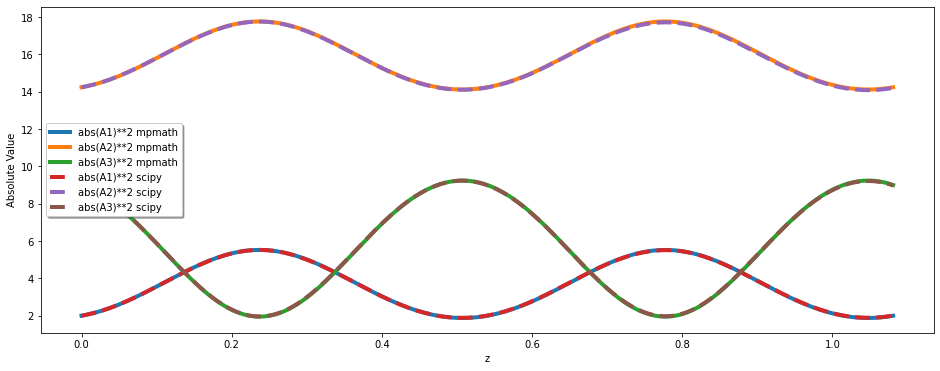

In [140]:
fig = plt.figure(figsize=(16, 6))
plt.plot(z_eval, square(absolute(A_sol_mpmath.T)), linestyle="solid", linewidth=4) 
plt.plot(z_eval, square(absolute(A_sol_scipy.T)), linestyle="dashed", linewidth=4) 
plt.legend(['abs(A1)**2 mpmath', 'abs(A2)**2 mpmath', 'abs(A3)**2 mpmath',
           'abs(A1)**2 scipy', 'abs(A2)**2 scipy', 'abs(A3)**2 scipy'], shadow=True) 
plt.ylabel('Absolute Value')
plt.xlabel('z')
plt.show()

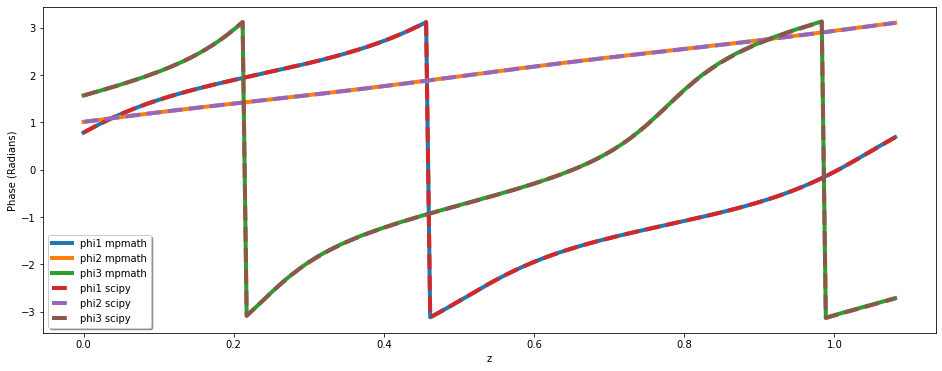

In [141]:
fig = plt.figure(figsize=(16, 6))
plt.plot(z_eval, angle(A_sol_mpmath.T), linestyle="solid", linewidth=4) 
plt.plot(z_eval, angle(A_sol_scipy.T), linestyle="dashed", linewidth=4) 
plt.legend(['phi1 mpmath', 'phi2 mpmath', 'phi3 mpmath',
           'phi1 scipy', 'phi2 scipy', 'phi3 scipy'], shadow=True) 
plt.ylabel('Phase (Radians)')
plt.xlabel('z')
plt.show()

## Conservation of K, quasi periodicity, and congruent points

By the equations of motion, the following equation is constant for all z:

In [187]:
Kval_eq

Eq(K, A1(z)*A2(z)*Ac3(z) + A1(z)*Ac1(z) + A2(z)*Ac2(z) + A3(z)*Ac1(z)*Ac2(z) + A3(z)*Ac3(z)/2)

Thus after shifting z by $2\omega_1$ the value is unchanged:

In [188]:
Kval_eq.subs(z,z+2*omega1)

Eq(K, A1(2*omega1 + z)*A2(2*omega1 + z)*Ac3(2*omega1 + z) + A1(2*omega1 + z)*Ac1(2*omega1 + z) + A2(2*omega1 + z)*Ac2(2*omega1 + z) + A3(2*omega1 + z)*Ac1(2*omega1 + z)*Ac2(2*omega1 + z) + A3(2*omega1 + z)*Ac3(2*omega1 + z)/2)

and by the quasi periodicity expressions for the modes this is equivalent to:

In [193]:
Kval_eq_2omega1_shift = Kval_eq.subs(z,z+2*omega1).subs([
    (eq1_result_c_2omega1_shift.lhs, eq1_result_c_2omega1_shift.rhs), 
    (eq2_result_c_2omega1_shift.lhs, eq2_result_c_2omega1_shift.rhs), 
    (eq3_result_c_2omega1_shift.lhs, eq3_result_c_2omega1_shift.rhs), 
    (eq1_result_c_2omega1_shift_conj.lhs, eq1_result_c_2omega1_shift_conj.rhs), 
    (eq2_result_c_2omega1_shift_conj.lhs, eq2_result_c_2omega1_shift_conj.rhs), 
    (eq3_result_c_2omega1_shift_conj.lhs, eq3_result_c_2omega1_shift_conj.rhs)
]).simplify()
Kval_eq_2omega1_shift

Eq(K, A1(z)*A2(z)*Ac3(z)*exp(2*eta1*xi1 + 2*eta1*xi2 - 2*eta1*xi3 - 2*omega1*zw(xi1, g2, g3) - 2*omega1*zw(xi2, g2, g3) + 2*omega1*zw(xi3, g2, g3) - I*omega1) + A1(z)*Ac1(z) + A2(z)*Ac2(z) + A3(z)*Ac1(z)*Ac2(z)*exp(-2*eta1*xi1 - 2*eta1*xi2 + 2*eta1*xi3 + 2*omega1*zw(xi1, g2, g3) + 2*omega1*zw(xi2, g2, g3) - 2*omega1*zw(xi3, g2, g3) + I*omega1) + A3(z)*Ac3(z)/2)

Thus, subtracting the shifted from the unshifted K indicates that:

In [297]:
eta_K_eq = Eq(Kval_eq.lhs - Kval_eq_2omega1_shift.lhs, 
   (Kval_eq.rhs - Kval_eq_2omega1_shift.rhs).collect([A1(z)*A2(z)*Ac3(z), Ac1(z)*Ac2(z)*A3(z)])
  )
eta_K_eq

Eq(0, (1 - exp(-2*eta1*xi1 - 2*eta1*xi2 + 2*eta1*xi3 + 2*omega1*zw(xi1, g2, g3) + 2*omega1*zw(xi2, g2, g3) - 2*omega1*zw(xi3, g2, g3) + I*omega1))*A3(z)*Ac1(z)*Ac2(z) + (1 - exp(2*eta1*xi1 + 2*eta1*xi2 - 2*eta1*xi3 - 2*omega1*zw(xi1, g2, g3) - 2*omega1*zw(xi2, g2, g3) + 2*omega1*zw(xi3, g2, g3) - I*omega1))*A1(z)*A2(z)*Ac3(z))

In [405]:
eta_phase_eq = (factor(2*eta1*xi1 + 2*eta1*xi2 - 2*eta1*xi3) +  
      factor(- 2*omega1*zw(xi1, g2, g3) - 2*omega1*zw(xi2, g2, g3) + 2*omega1*zw(xi3, g2, g3)) - I*omega1
     )

but by the congruence relations between $\xi_1,\xi_2,\xi_3$:

In [382]:
eta_1_3_terms = 2*eta1*n+2*eta3*m
zw_xi_1_2_3_eta_1_3 = Eq(zw_xi1_xi2_xi3_eq.lhs + eta_1_3_terms,zw_xi1_xi2_xi3_eq.rhs + eta_1_3_terms)
zw_xi_1_2_3_eta_1_3

Eq(zw(xi1, g2, g3) + zw(xi2, g2, g3) - zw(xi3, g2, g3), 2*eta1*n + 2*eta3*m - I/2)

In [381]:
xi_3_congruence_eq

Eq(2*m*omega3 + 2*n*omega1 + xi3, xi1 + xi2)

In [390]:
eta_phase_eq_eta_omega_id = Eq(eta_phase_eq,
eta_phase_eq.subs(zw_xi_1_2_3_eta_1_3.lhs, zw_xi_1_2_3_eta_1_3.rhs).subs(xi3, solve(xi_3_congruence_eq,xi3)[0]).simplify()
  )
eta_phase_eq_eta_omega_id

Eq(2*eta1*(xi1 + xi2 - xi3) - 2*omega1*(zw(xi1, g2, g3) + zw(xi2, g2, g3) - zw(xi3, g2, g3)) - I*omega1, 4*m*(eta1*omega3 - eta3*omega1))

and the following known identity:
https://dlmf.nist.gov/23.2

In [389]:
eta_omega_id = Eq(eta1*omega3 - eta3*omega1, I*pi/2)
eta_omega_id

Eq(eta1*omega3 - eta3*omega1, I*pi/2)

it is seen that:

In [392]:
eta_phase_2pi_m_eq = eta_phase_eq_eta_omega_id.subs(eta_omega_id.lhs, eta_omega_id.rhs)
eta_phase_2pi_m_eq

Eq(2*eta1*(xi1 + xi2 - xi3) - 2*omega1*(zw(xi1, g2, g3) + zw(xi2, g2, g3) - zw(xi3, g2, g3)) - I*omega1, 2*I*pi*m)

In [393]:
Eq(exp(eta_phase_2pi_m_eq.lhs),1)

Eq(exp(2*eta1*(xi1 + xi2 - xi3) - 2*omega1*(zw(xi1, g2, g3) + zw(xi2, g2, g3) - zw(xi3, g2, g3)) - I*omega1), 1)

and thus the conservation of K (Hamiltonian) further validates the congruence relationship between $\xi_1,\xi_2,\xi_3$ and the quasi periodicty relations for the modes.

## Conservation of K as an identity in sigma

In [123]:
A_sigma_subs = [
    (eq1_result_c.lhs, eq1_result_c.rhs), (eq2_result_c.lhs, eq2_result_c.rhs), (eq3_result_c.lhs, eq3_result_c.rhs),
    (eq1_result_c_conj.lhs, eq1_result_c_conj.rhs), (eq2_result_c_conj.lhs, eq2_result_c_conj.rhs), 
    (eq3_result_c_conj.lhs, eq3_result_c_conj.rhs)
]

In [124]:
K_sigma_id_1 = Kval_eq.subs(A_sigma_subs).simplify().expand()
K_sigma_id_1

Eq(K, -c1*c2*sigma(xi1 + z - z0, g2, g3)*sigma(xi2 + z - z0, g2, g3)*sigma(-xi3 + z - z0, g2, g3)*exp(-I*z/2)*exp(-z*zw(xi1, g2, g3))*exp(-z*zw(xi2, g2, g3))*exp(z*zw(xi3, g2, g3))/(c3*sigma(xi3, g2, g3)**2*sigma(z - z0, g2, g3)**3) - sigma(-xi3 + z - z0, g2, g3)*sigma(xi3 + z - z0, g2, g3)/(2*sigma(xi3, g2, g3)**2*sigma(z - z0, g2, g3)**2) + sigma(-xi2 + z - z0, g2, g3)*sigma(xi2 + z - z0, g2, g3)/(2*sigma(xi2, g2, g3)**2*sigma(z - z0, g2, g3)**2) + sigma(-xi1 + z - z0, g2, g3)*sigma(xi1 + z - z0, g2, g3)/(2*sigma(xi1, g2, g3)**2*sigma(z - z0, g2, g3)**2) + c3*sigma(-xi1 + z - z0, g2, g3)*sigma(-xi2 + z - z0, g2, g3)*sigma(xi3 + z - z0, g2, g3)*exp(I*z/2)*exp(z*zw(xi1, g2, g3))*exp(z*zw(xi2, g2, g3))*exp(-z*zw(xi3, g2, g3))/(4*c1*c2*sigma(xi1, g2, g3)**2*sigma(xi2, g2, g3)**2*sigma(z - z0, g2, g3)**3))

In [125]:
K_sigma_id_2 = K_sigma_id_1.subs([
    (sigma_p_identity.rhs.subs([(x,z-z0),(y,xi1)]),sigma_p_identity.lhs.subs([(x,z-z0),(y,xi1)])),
    (sigma_p_identity.rhs.subs([(x,z-z0),(y,xi2)]),sigma_p_identity.lhs.subs([(x,z-z0),(y,xi2)])),
    (sigma_p_identity.rhs.subs([(x,z-z0),(y,xi3)]),sigma_p_identity.lhs.subs([(x,z-z0),(y,xi3)]))
])
pw_terms_in_K_sigma_id_2 = pw(xi1,g2,g3)/2 + pw(xi2,g2,g3)/2 - pw(xi3,g2,g3)/2 - pw(z - z0,g2,g3)/2
K_sigma_id_2 = Eq(K_sigma_id_2.lhs - pw_terms_in_K_sigma_id_2, K_sigma_id_2.rhs - pw_terms_in_K_sigma_id_2)
K_sigma_id_2

Eq(K - pw(xi1, g2, g3)/2 - pw(xi2, g2, g3)/2 + pw(xi3, g2, g3)/2 + pw(z - z0, g2, g3)/2, -c1*c2*sigma(xi1 + z - z0, g2, g3)*sigma(xi2 + z - z0, g2, g3)*sigma(-xi3 + z - z0, g2, g3)*exp(-I*z/2)*exp(-z*zw(xi1, g2, g3))*exp(-z*zw(xi2, g2, g3))*exp(z*zw(xi3, g2, g3))/(c3*sigma(xi3, g2, g3)**2*sigma(z - z0, g2, g3)**3) + c3*sigma(-xi1 + z - z0, g2, g3)*sigma(-xi2 + z - z0, g2, g3)*sigma(xi3 + z - z0, g2, g3)*exp(I*z/2)*exp(z*zw(xi1, g2, g3))*exp(z*zw(xi2, g2, g3))*exp(-z*zw(xi3, g2, g3))/(4*c1*c2*sigma(xi1, g2, g3)**2*sigma(xi2, g2, g3)**2*sigma(z - z0, g2, g3)**3))

In [340]:
K_sigma_id_3 = K_sigma_id_2.subs([
    (xi1_p1.lhs, xi1_p1.rhs), (xi2_p2.lhs, xi2_p2.rhs), (xi3_p1_p2.lhs, xi3_p1_p2.rhs), (K, K_val_in_p)
])
K_sigma_id_3

Eq(-p1/2 + p3/2 + pw(z - z0, g2, g3)/2, -c1*c2*sigma(xi1 + z - z0, g2, g3)*sigma(xi2 + z - z0, g2, g3)*sigma(-xi3 + z - z0, g2, g3)*exp(-I*z/2)*exp(-z*zw(xi1, g2, g3))*exp(-z*zw(xi2, g2, g3))*exp(z*zw(xi3, g2, g3))/(c3*sigma(xi3, g2, g3)**2*sigma(z - z0, g2, g3)**3) + c3*sigma(-xi1 + z - z0, g2, g3)*sigma(-xi2 + z - z0, g2, g3)*sigma(xi3 + z - z0, g2, g3)*exp(I*z/2)*exp(z*zw(xi1, g2, g3))*exp(z*zw(xi2, g2, g3))*exp(-z*zw(xi3, g2, g3))/(4*c1*c2*sigma(xi1, g2, g3)**2*sigma(xi2, g2, g3)**2*sigma(z - z0, g2, g3)**3))

In [401]:
xi4_p2_p3 = Eq(pw(xi4,g2,g3)/2, p1/2 - p3/2)
xi4_p2_p3

Eq(pw(xi4, g2, g3)/2, p1/2 - p3/2)

In [402]:
K_sigma_id_4 = K_sigma_id_3.subs(xi4_p2_p3.rhs,xi4_p2_p3.lhs)
K_sigma_id_4

Eq(-pw(xi4, g2, g3)/2 + pw(z - z0, g2, g3)/2, -c1*c2*sigma(xi1 + z - z0, g2, g3)*sigma(xi2 + z - z0, g2, g3)*sigma(-xi3 + z - z0, g2, g3)*exp(-I*z/2)*exp(-z*zw(xi1, g2, g3))*exp(-z*zw(xi2, g2, g3))*exp(z*zw(xi3, g2, g3))/(c3*sigma(xi3, g2, g3)**2*sigma(z - z0, g2, g3)**3) + c3*sigma(-xi1 + z - z0, g2, g3)*sigma(-xi2 + z - z0, g2, g3)*sigma(xi3 + z - z0, g2, g3)*exp(I*z/2)*exp(z*zw(xi1, g2, g3))*exp(z*zw(xi2, g2, g3))*exp(-z*zw(xi3, g2, g3))/(4*c1*c2*sigma(xi1, g2, g3)**2*sigma(xi2, g2, g3)**2*sigma(z - z0, g2, g3)**3))

In [403]:
K_sigma_id_5 = K_sigma_id_4.subs(
    sigma_p_identity.subs([(x,xi4),(y,z-z0)]).lhs/2, sigma_p_identity.subs([(x,xi4),(y,z-z0)]).rhs/2
)
K_sigma_id_5

Eq(sigma(xi4 - z + z0, g2, g3)*sigma(xi4 + z - z0, g2, g3)/(2*sigma(xi4, g2, g3)**2*sigma(z - z0, g2, g3)**2), -c1*c2*sigma(xi1 + z - z0, g2, g3)*sigma(xi2 + z - z0, g2, g3)*sigma(-xi3 + z - z0, g2, g3)*exp(-I*z/2)*exp(-z*zw(xi1, g2, g3))*exp(-z*zw(xi2, g2, g3))*exp(z*zw(xi3, g2, g3))/(c3*sigma(xi3, g2, g3)**2*sigma(z - z0, g2, g3)**3) + c3*sigma(-xi1 + z - z0, g2, g3)*sigma(-xi2 + z - z0, g2, g3)*sigma(xi3 + z - z0, g2, g3)*exp(I*z/2)*exp(z*zw(xi1, g2, g3))*exp(z*zw(xi2, g2, g3))*exp(-z*zw(xi3, g2, g3))/(4*c1*c2*sigma(xi1, g2, g3)**2*sigma(xi2, g2, g3)**2*sigma(z - z0, g2, g3)**3))

In [404]:
z0_multiply_terms = 2*sigma(z-z0,g2,g3)**3*sigma(xi1,g2,g3)**2*sigma(xi2,g2,g3)**2*sigma(xi3,g2,g3)**2*sigma(xi4,g2,g3)**2
Eq(K_sigma_id_5.lhs*z0_multiply_terms, K_sigma_id_5.rhs*z0_multiply_terms).expand()

Eq(sigma(xi1, g2, g3)**2*sigma(xi2, g2, g3)**2*sigma(xi3, g2, g3)**2*sigma(z - z0, g2, g3)*sigma(xi4 - z + z0, g2, g3)*sigma(xi4 + z - z0, g2, g3), -2*c1*c2*sigma(xi1, g2, g3)**2*sigma(xi2, g2, g3)**2*sigma(xi4, g2, g3)**2*sigma(xi1 + z - z0, g2, g3)*sigma(xi2 + z - z0, g2, g3)*sigma(-xi3 + z - z0, g2, g3)*exp(-I*z/2)*exp(-z*zw(xi1, g2, g3))*exp(-z*zw(xi2, g2, g3))*exp(z*zw(xi3, g2, g3))/c3 + c3*sigma(xi3, g2, g3)**2*sigma(xi4, g2, g3)**2*sigma(-xi1 + z - z0, g2, g3)*sigma(-xi2 + z - z0, g2, g3)*sigma(xi3 + z - z0, g2, g3)*exp(I*z/2)*exp(z*zw(xi1, g2, g3))*exp(z*zw(xi2, g2, g3))*exp(-z*zw(xi3, g2, g3))/(2*c1*c2))

In [131]:
xi1_p1

Eq(pw(xi1, g2, g3), p1)

In [132]:
xi2_p2

Eq(pw(xi2, g2, g3), p2)

In [133]:
xi3_p1_p2

Eq(pw(xi3, g2, g3), -p1 - p2 - 1/4)

In [134]:
eq_pwp_xi1

Eq(pwp(xi1, g2, g3), I*p3)

In [135]:
eq_pwp_xi2

Eq(pwp(xi2, g2, g3), I*(-p1 + p2 + p3))

In [136]:
eq_pwp_xi3

Eq(pwp(xi3, g2, g3), I*(2*p1 + p2 - p3 + 1/4))

In [411]:
Eq(xi1_p1.lhs + I*eq_pwp_xi1.lhs, xi1_p1.rhs + I*eq_pwp_xi1.rhs).subs(xi4_p2_p3.rhs*2,xi4_p2_p3.lhs*2)

Eq(pw(xi1, g2, g3) + I*pwp(xi1, g2, g3), pw(xi4, g2, g3))

In [412]:
Eq(xi2_p2.lhs + I*eq_pwp_xi2.lhs, xi2_p2.rhs + I*eq_pwp_xi2.rhs).subs(xi4_p2_p3.rhs*2,xi4_p2_p3.lhs*2)

Eq(pw(xi2, g2, g3) + I*pwp(xi2, g2, g3), pw(xi4, g2, g3))

In [415]:
Eq(xi3_p1_p2.lhs - I*eq_pwp_xi3.lhs, xi3_p1_p2.rhs - I*eq_pwp_xi3.rhs).subs(xi4_p2_p3.rhs*2,xi4_p2_p3.lhs*2)

Eq(pw(xi3, g2, g3) - I*pwp(xi3, g2, g3), pw(xi4, g2, g3))

Known idenity:
https://dlmf.nist.gov/23.10

In [419]:
Eq(sigma(2*z,g2,g3), - pwp(z,g2,g3) * sigma(z,g2,g3)**4)

Eq(sigma(2*z, g2, g3), -pwp(z, g2, g3)*sigma(z, g2, g3)**4)